In [19]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.transform


def magnitude(fft_im):
    real = fft_im.real
    imag = fft_im.imag
    return np.sqrt(real**2 + imag**2)


def phase(fft_im):
    real = fft_im.real + 1e-16
    imag = fft_im.imag
    return np.arctan(imag/real)


def create_low_pass_frequency_kernel(im: np.array,
                                      radius: int):
    center_col = im.shape[1] // 2
    center_row = im.shape[0] // 2
    assert len(im.shape) == 2,\
        "Expected a grayscale image. Got image shape: {}".format(im.shape)
    kernel = np.ones_like((im))
    rr, cc = skimage.draw.disk((center_row, center_col), radius, shape=im.shape)
    kernel[rr, cc] = 0.0
    kernel = np.fft.fftshift(kernel)
    return 1 - kernel

This tutorial is a modification of [this article](https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm) for the TDT4195 course at NTNU. 

A fourier transform is a toll which we can use to transform an image (from the *spatial domain*) into the *frequency domain* (or fourier domain). 

Formally, the **discrete fourier transform** (DFT) of an $N \times M$ image is given by:

$$
F(u,v) = \sum_{x=0}^{N-1} \sum_{y=0}^{M-1} f(x, y) e^{-i2 \pi (\frac{xu}{N} + \frac{yv}{M})}
\text{ where } f(x,y) \in \mathbb{R}^N \times \mathbb{R}^M
$$


where $f(x,y)$ is the image intensity in the spatial domain, and the exponential term is the basis function corresponding to each point $F(u,v)$ in the frequency domain.
You can interpret the equation that each value $F(u,v)$ in the frequency domain is given by multiplying the spatial intensity level with a corresponding basis function and summing over all pixels.

In a similar way, the frequency image can be transformed to the spatial domain. The **inverse fourier transform** is given by:

$$
f(x,y) = \frac{1}{N^2} \sum_{u=0}^{N-1} \sum_{v=0}^{M-1} F(u,v) e^{i2 \pi (\frac{xu}{N} + \frac{yv}{M})}
$$


The computational complexity of DFT is $\mathcal{O}(N^3)$, assuming $N=M$.
Fortunately, the fast Fourier Transform (FFT) reduces the computational complexity of DFT to $\mathcal{O}(N^2 log_2 N)$.
Therefore, performing convolution in the frequency domain can be computationally faster than in the spatial domain, depending on the kernel and image size.

### Properties of the output of a fourier transform
1. The fourier transform output ($F(u,v)$ is a **complex number** (with a real and imaginary part) for each location $(u,v)$ in the frequency domain.
2. Each loaction $(u,v)$ in the frequency domain corresponds to a specific frequency. 
3. The output frequency "image" **$F$ will be the same shape as the image in the spatial domain**. To clarify, for a given spatial Image $I$ with shape $N \times M$, the frequency image $F$ will have shape $N \times M$, where $F(u,v) \in \mathbb{C}$.
4. The **DC component** $F(0, 0)$ corresponds to the mean pixel intensity in the spatial domain (original image).
5. The frequency domain is horizontal and vertically **symetric**.
6. The dynamic range of the frequency domain is usually quite large; therefore, it's common to use a logarithmic transform to visualize the image. The logarithmic transform is given by: $h(a) = log(a + 1)$.

Note that a complex number (each $F(u,v)$) $e^{it}$ can be written in terms of an imaginary sine part and real cosine part (Euler's formula):
$$
e^{it} = cos(t) + i \cdot sin(t) 
$$
where $i^2 = -1$. 
From this, you can view the fourier image as a sum of sine and cosine functions, where each is described by $F(u,v)$ and the frequency described from $(u,v)$.

## Usage
Below we will describe the fourier transform and its properties through a couple of examples.

First, if we create a single line through the image:

Text(0.5, 1.0, 'Frequency Domain (Magnitude)')

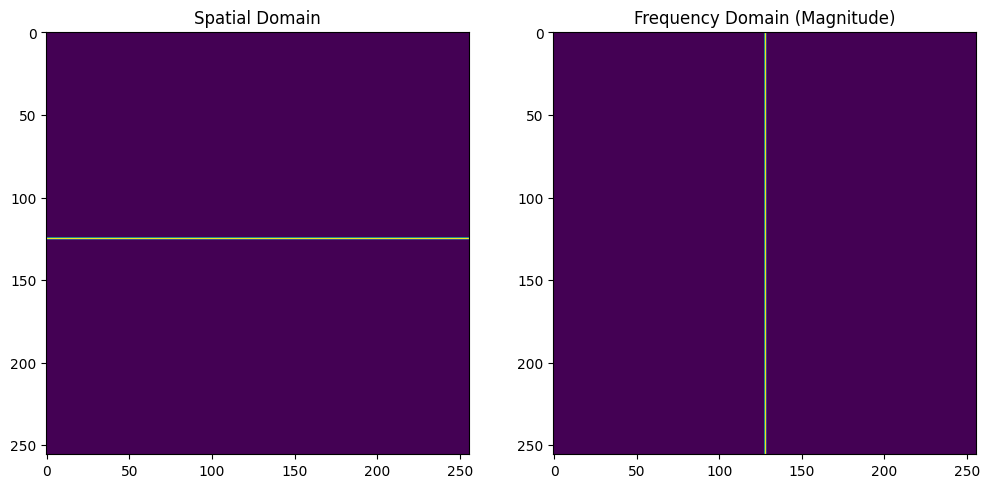

In [20]:
im = np.zeros((256, 256))
im[125] = 1

fft = np.fft.fft2(im)
to_visualize = np.fft.fftshift(fft)
to_visualize = np.log(magnitude(to_visualize)+1)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title("Spatial Domain")
plt.subplot(1, 2, 2)
plt.imshow(to_visualize)
plt.title("Frequency Domain (Magnitude)")

Here we find the fourier transform.
Note that we use `fftshift` to shift the image, such that the **DC compontent ($F(0,0)$) is centered in the image**.

Notice that the fourier transform lies on a vertical line (not horizontal), and this is because the image intensity in the spatial domain changes the most if we go along the image vertically.

---


Let's create another image with periodic stripes (one 2 pixel stripe per 4 pixel) the fourier transform is shown below.

Note that:
1. The transform is symmetric with respect to the horizontal axis.
2. We get three main values in the frequency domain: the DC component (center of image), and two values in the middle between the DC component and the edge.

Looking at the frequency domain, we can notice that the periodic signal in the spatial domain has a frequency of $\frac{F_{max}}{2}$, since it's in the middle between the center (DC component) and the edge ($F_{max}$).

You could actually validate this yourself: Change the code under, such that each white stripe is one pixel white, with 1 black pixel inbetween each strip.
Then the main value will shift to the edge of the image.

Text(0.5, 1.0, 'Frequency Domain (Magnitude)')

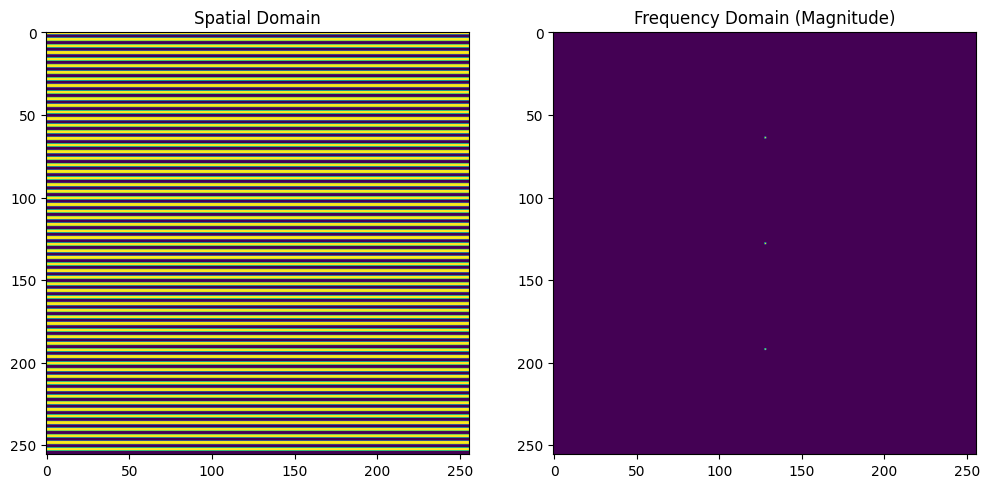

In [21]:
im = np.zeros((256, 256))
for i in range(0, 255, 4):
    im[i:i+2] = 1

fft = np.fft.fft2(im)
to_visualize = np.fft.fftshift(fft)
to_visualize = np.log(magnitude(to_visualize)+1)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title("Spatial Domain")
plt.subplot(1, 2, 2)
plt.imshow(to_visualize)
plt.title("Frequency Domain (Magnitude)")

If we create vertical lines in the spatial domain, you notice that the frequency domain rotates compared to the previous image.

Text(0.5, 1.0, 'Frequency Domain (Magnitude)')

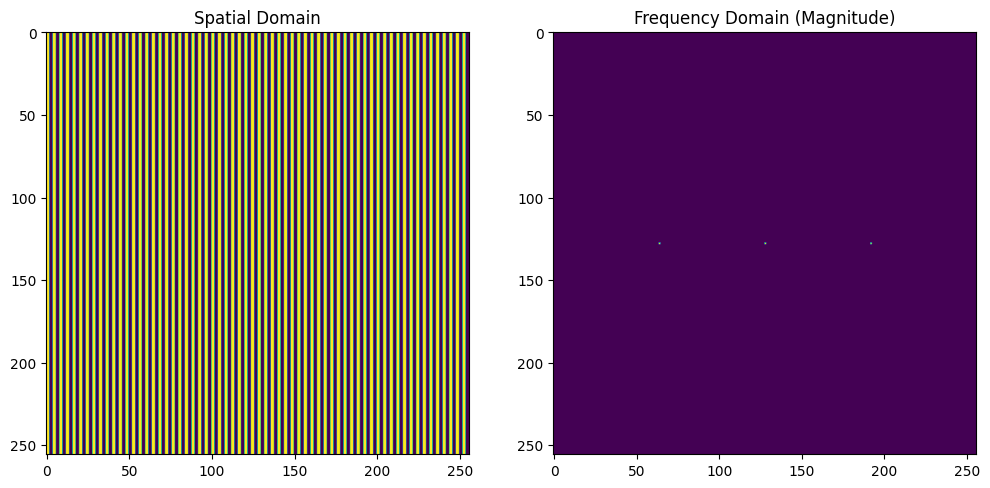

In [22]:
im = np.zeros((256, 256))
for i in range(0, 255, 4):
    im[:, i:i+2] = 1

fft = np.fft.fft2(im)
to_visualize = np.fft.fftshift(fft)
to_visualize = np.log(magnitude(to_visualize)+1)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title("Spatial Domain")
plt.subplot(1, 2, 2)
plt.imshow(to_visualize)
plt.title("Frequency Domain (Magnitude)")

Let's rotate our vertical image in the spatial domain by 45 degrees.

See below, and observe the following:
1. Since an image is sampled into a rectangular grid, it's impossible to create a perfect periodic signal which is diagonal and we have to approximate it.
2. Therefore, the log transform will include several minor frequencies from the noise that is generated when we create a approximation to diagonal line (see log transform).
3. We could use thresholding to visualize the log transform (as shown below).

Text(0.5, 1.0, 'Frequency Domain (Magnitude) - Log transform thresholded')

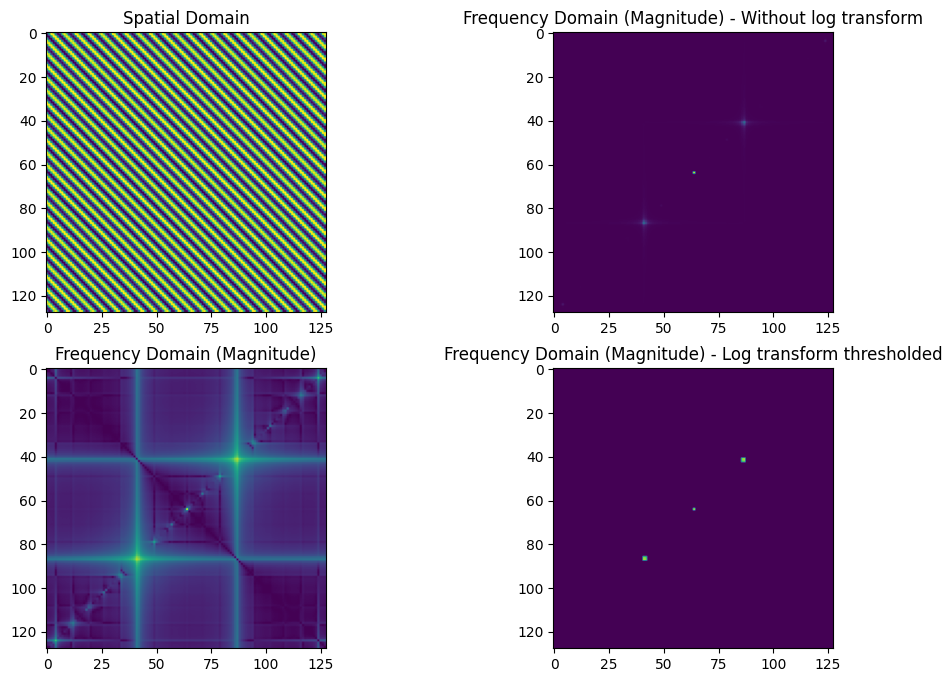

In [23]:
im = np.zeros((256, 256))
for i in range(0, 255, 4):
    im[:, i:i+2] = 1
# Slice the image to remove black edges from rotating the image
im = skimage.transform.rotate(im, 45)[64:256-64, 64:256-64]
fft = np.fft.fft2(im)

to_visualize = np.fft.fftshift(fft)
to_visualize = magnitude(to_visualize)
log_transform = np.log(to_visualize+1)
log_transform_thresholded = log_transform.copy()
log_transform_thresholded[log_transform < log_transform.max() * 0.75] = 0
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(im)
plt.title("Spatial Domain")
plt.subplot(2, 2, 2)
plt.imshow(to_visualize)
plt.title("Frequency Domain (Magnitude) - Without log transform")
plt.subplot(2, 2, 3)
plt.imshow(log_transform)
plt.title("Frequency Domain (Magnitude)")
plt.subplot(2, 2, 4)
plt.imshow(log_transform_thresholded)
plt.title("Frequency Domain (Magnitude) - Log transform thresholded")

In this example, we will look at a real image.

Notice in this example:
1. The frequency domain is symmetric along horizontal and vertical axis.
2. We are able to restore the original image with the inverse fourier transform `ifft`.
3. If we rotate the frequency domain, the spatial image is rotated as well.
4. We are able to blur the image by using a low-pass filter. This removes all high frequencies (high frequencies often corresponds to noise).

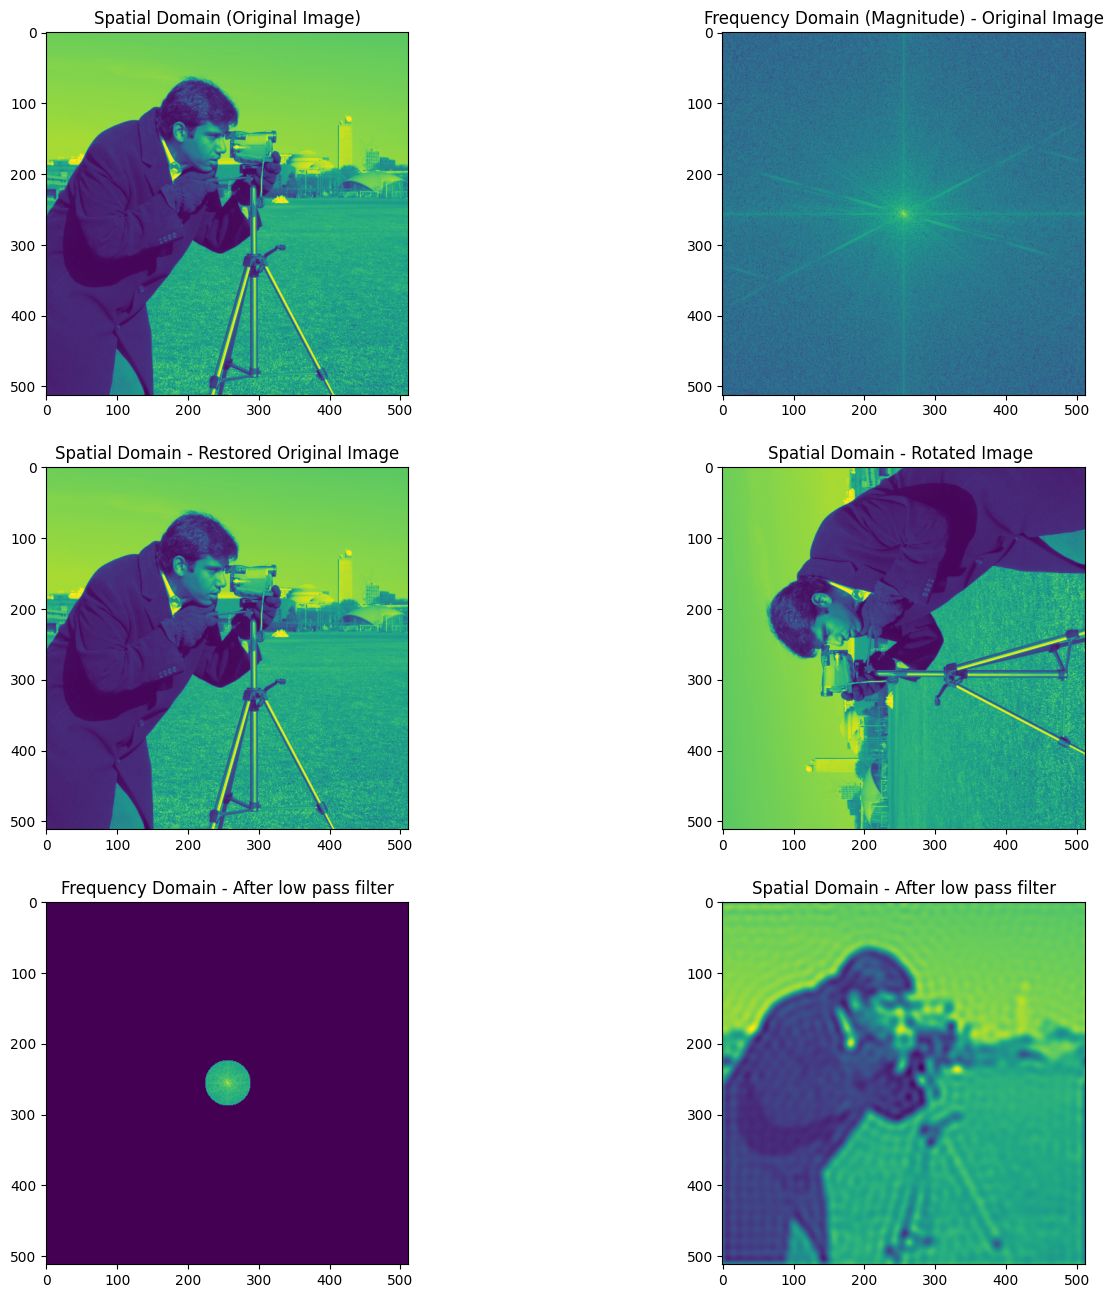

In [24]:
import skimage.data
im = skimage.data.camera()
fft = np.fft.fft2(im)
to_visualize = np.fft.fftshift(fft)
to_visualize = np.log(magnitude(to_visualize)+1)
# Take the real component as we have roundoff errors.
restored_im = np.fft.ifft2(fft).real

rotated_fft = fft.T
restored_im_rotated = np.fft.ifft2(rotated_fft).real

low_pass_filter = create_low_pass_frequency_kernel(im, 32)
fft_lowpass = fft * low_pass_filter
fft_lowpass_vis = np.fft.fftshift(fft_lowpass)
fft_lowpass_vis = np.log(magnitude(fft_lowpass_vis) + 1)
restored_im_lowpass = np.fft.ifft2(fft_lowpass).real


plt.figure(figsize=(16, 16))
plt.subplot(3, 2, 1)
plt.imshow(im)
plt.title("Spatial Domain (Original Image)")
plt.subplot(3, 2, 2)
plt.imshow(to_visualize)
plt.title("Frequency Domain (Magnitude) - Original Image")
plt.subplot(3, 2, 3)
plt.title("Spatial Domain - Restored Original Image")
plt.imshow(restored_im)
plt.subplot(3, 2, 4)
plt.imshow(restored_im_rotated)
plt.title("Spatial Domain - Rotated Image ")
plt.subplot(3, 2, 5)
plt.title("Frequency Domain - After low pass filter")
plt.imshow(fft_lowpass_vis)
plt.subplot(3, 2, 6)
plt.title("Spatial Domain - After low pass filter")
plt.imshow(restored_im_lowpass)